In [16]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
from fenics import *
from mshr import *
import numpy as np
from dotenv import load_dotenv
from scipy.ndimage import zoom
import os

# Cargar las variables del archivo .env
load_dotenv()

True

In [2]:
T=0.23  # final time
dt=0.001  # time step size
x_max = 0.23
y_max = 10

In [4]:
def get_correlation(step, corr_type):
    file = "correlation_"+corr_type+"_"+"{:.3f}".format(step)+".txt"
    corr = np.loadtxt(file, float)
    
    return corr

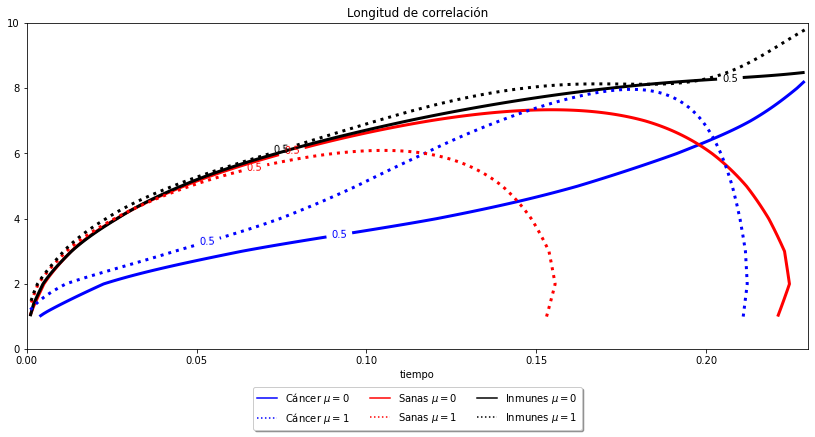

In [59]:
fig, ax = plt.subplots(figsize=(14, 6))  # Ajustar el tamaño del gráfico, más ancho

# path con resultados mu = 0
path_mu_cero = '/media/erick/TOSHIBA EXT/pruebas_mu_cero'
os.chdir(path_mu_cero)

# Cargar el archivo de correlación para el primer paso ('cc')
corr_cc = "correlation_" + "cc" + "_" + "{:.3f}".format(dt) + ".txt"
corr_cc = np.loadtxt(corr_cc, float)

# Definir los ejes X (tiempo) y Y (número de correlaciones)
X = np.arange(dt, T, dt)  # Tiempo en el eje X
Y = np.arange(0, len(corr_cc), 1)  # Correlaciones en el eje Y

# Filtrar Y para que sea mayor o igual a 0.3
Y_filtered = Y[Y >= 0.3]

# Reajustar X y generar la malla (meshgrid) con el Y filtrado
X, Y_filtered = np.meshgrid(X, Y_filtered)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'cc'
Z_cc = np.array([get_correlation(i, "cc")[Y >= 0.24] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_cc = ax.contour(X, Y_filtered, Z_cc, levels=[0.5], colors='blue', linewidths=3)
ax.clabel(CS_cc, inline=True, fontsize=10)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'ss'
Z_ss = np.array([get_correlation(i, "ss")[Y >= 0.2] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_ss = ax.contour(X, Y_filtered, Z_ss, levels=[0.5], colors='red', linewidths=3)
ax.clabel(CS_ss, inline=True, fontsize=10)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'ii'
Z_ii = np.array([get_correlation(i, "ii")[Y >= 0.2] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_ii = ax.contour(X, Y_filtered, Z_ii, levels=[0.5], colors='black', linewidths=3)
ax.clabel(CS_ii, inline=True, fontsize=10)


# path con resultados mu = 1
path_mu_uno = '/media/erick/TOSHIBA EXT/pruebas_1'
os.chdir(path_mu_uno)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'cc'
Z_cc = np.array([get_correlation(i, "cc")[Y >= 0.24] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_cc = ax.contour(X, Y_filtered, Z_cc, levels=[0.5], colors='blue', linewidths=3, linestyles='dotted')
ax.clabel(CS_cc, inline=True, fontsize=10)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'ss'
Z_ss = np.array([get_correlation(i, "ss")[Y >= 0.2] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_ss = ax.contour(X, Y_filtered, Z_ss, levels=[0.5], colors='red', linewidths=3, linestyles='dotted')
ax.clabel(CS_ss, inline=True, fontsize=10)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'ii'
Z_ii = np.array([get_correlation(i, "ii")[Y >= 0.2] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_ii = ax.contour(X, Y_filtered, Z_ii, levels=[0.5], colors='black', linewidths=3, linestyles='dotted')
ax.clabel(CS_ii, inline=True, fontsize=10)

# Títulos y etiquetas
ax.set_title('Longitud de correlación')
ax.set_xlabel('tiempo')

# Configurar límites de los ejes
ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

# Crear leyendas personalizadas para los contornos
cc_line = mlines.Line2D([], [], color='blue', label=r'Cáncer $\mu=0$')
ss_line = mlines.Line2D([], [], color='red', label=r'Sanas $\mu=0$')
ii_line = mlines.Line2D([], [], color='black', label=r'Inmunes $\mu=0$')

# Crear leyendas personalizadas para los contornos con líneas punteadas
cc_line_2 = mlines.Line2D([], [], color='blue', linestyle='dotted', label=r'Cáncer $\mu=1$')
ss_line_2 = mlines.Line2D([], [], color='red', linestyle='dotted', label=r'Sanas $\mu=1$')
ii_line_2 = mlines.Line2D([], [], color='black', linestyle='dotted', label=r'Inmunes $\mu=1$')
# Colocar la leyenda a la derecha de la gráfica
ax.legend(handles=[cc_line, cc_line_2, ss_line,  ss_line_2, ii_line,  ii_line_2], loc='upper center', bbox_to_anchor=(0.5, -0.1), 
          fancybox=True, shadow=True, ncol=3)

# path con resultados mu = 0
path_local = '/home/erick/Desktop/Doctorado/doctorado_efsg/CNF/weak_allee_mu_1/'
os.chdir(path_local)

plt.savefig("autocorrelacion_longitud.png", bbox_inches='tight', dpi=300)
plt.show()

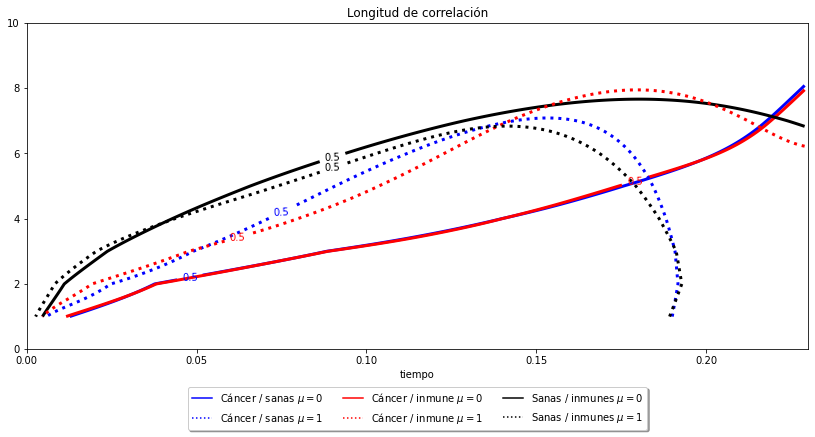

In [60]:
fig, ax = plt.subplots(figsize=(14, 6))  # Ajustar el tamaño del gráfico, más ancho

# path con resultados mu = 0
path_mu_cero = '/media/erick/TOSHIBA EXT/pruebas_mu_cero'
os.chdir(path_mu_cero)

# Cargar el archivo de correlación para el primer paso ('cc')
corr_cc = "correlation_" + "cc" + "_" + "{:.3f}".format(dt) + ".txt"
corr_cc = np.loadtxt(corr_cc, float)

# Definir los ejes X (tiempo) y Y (número de correlaciones)
X = np.arange(dt, T, dt)  # Tiempo en el eje X
Y = np.arange(0, len(corr_cc), 1)  # Correlaciones en el eje Y

# Filtrar Y para que sea mayor o igual a 0.3
Y_filtered = Y[Y >= 0.3]

# Reajustar X y generar la malla (meshgrid) con el Y filtrado
X, Y_filtered = np.meshgrid(X, Y_filtered)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'cc'
Z_cc = np.array([get_correlation(i, "cs")[Y >= 0.24] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_cc = ax.contour(X, Y_filtered, Z_cc, levels=[0.5], colors='blue', linewidths=3)
ax.clabel(CS_cc, inline=True, fontsize=10)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'ss'
Z_ss = np.array([get_correlation(i, "ci")[Y >= 0.2] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_ss = ax.contour(X, Y_filtered, Z_ss, levels=[0.5], colors='red', linewidths=3)
ax.clabel(CS_ss, inline=True, fontsize=10)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'ii'
Z_ii = np.array([get_correlation(i, "si")[Y >= 0.2] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_ii = ax.contour(X, Y_filtered, Z_ii, levels=[0.5], colors='black', linewidths=3)
ax.clabel(CS_ii, inline=True, fontsize=10)


# path con resultados mu = 1
path_mu_uno = '/media/erick/TOSHIBA EXT/pruebas_1'
os.chdir(path_mu_uno)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'cc'
Z_cc = np.array([get_correlation(i, "cs")[Y >= 0.24] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_cc = ax.contour(X, Y_filtered, Z_cc, levels=[0.5], colors='blue', linewidths=3, linestyles='dotted')
ax.clabel(CS_cc, inline=True, fontsize=10)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'ss'
Z_ss = np.array([get_correlation(i, "ci")[Y >= 0.2] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_ss = ax.contour(X, Y_filtered, Z_ss, levels=[0.5], colors='red', linewidths=3, linestyles='dotted')
ax.clabel(CS_ss, inline=True, fontsize=10)

# Calcular los valores de Z (correlaciones) para cada combinación de X e Y_filtered para 'ii'
Z_ii = np.array([get_correlation(i, "si")[Y >= 0.2] for i in np.arange(dt, T, dt)]).T  # Filtrar Z
CS_ii = ax.contour(X, Y_filtered, Z_ii, levels=[0.5], colors='black', linewidths=3, linestyles='dotted')
ax.clabel(CS_ii, inline=True, fontsize=10)

# Títulos y etiquetas
ax.set_title('Longitud de correlación')
ax.set_xlabel('tiempo')

# Configurar límites de los ejes
ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

# Crear leyendas personalizadas para los contornos
cc_line = mlines.Line2D([], [], color='blue', label=r'Cáncer / sanas ${\mu=0}$')
ss_line = mlines.Line2D([], [], color='red', label=r'Cáncer / inmune ${\mu=0}$')
ii_line = mlines.Line2D([], [], color='black', label=r'Sanas / inmunes ${\mu=0}$')

# Crear leyendas personalizadas para los contornos con líneas punteadas
cc_line_2 = mlines.Line2D([], [], color='blue', linestyle='dotted', label=r'Cáncer / sanas ${\mu=1}$')
ss_line_2 = mlines.Line2D([], [], color='red', linestyle='dotted', label=r'Cáncer / inmune ${\mu=1}$')
ii_line_2 = mlines.Line2D([], [], color='black', linestyle='dotted', label=r'Sanas / inmunes ${\mu=1}$')
# Colocar la leyenda a la derecha de la gráfica
ax.legend(handles=[cc_line, cc_line_2, ss_line, ss_line_2, ii_line, ii_line_2], loc='upper center', bbox_to_anchor=(0.5, -0.1), 
          fancybox=True, shadow=True, ncol=3)

# path con resultados mu = 0
path_local = '/home/erick/Desktop/Doctorado/doctorado_efsg/CNF/weak_allee_mu_1/'
os.chdir(path_local)

plt.savefig("cruzadacorrelacion_longitud.png", bbox_inches='tight', dpi=300)
plt.show()

In [9]:
corr_cc

array([0.        , 0.44777273, 0.28802978, 0.07214998, 0.01651273,
       0.01547702, 0.01477908, 0.01120576, 0.0096246 , 0.00961588,
       0.00835349, 0.00842506, 0.00767915, 0.00785565, 0.00942994,
       0.0106922 , 0.01126938, 0.00942004, 0.00802431, 0.00668203,
       0.00710592, 0.0083519 , 0.00790554, 0.00790794, 0.00928995,
       0.0099221 , 0.00877858, 0.007052  , 0.00658398, 0.00732082,
       0.00741678, 0.0067219 , 0.00578505, 0.00783597, 0.0102322 ,
       0.00696385, 0.00553567, 0.00744456, 0.00868216, 0.00938488,
       0.01045041, 0.01074457, 0.00859224, 0.00783281, 0.00960799,
       0.00890553, 0.00897823, 0.00862802, 0.0074622 , 0.00893834,
       0.0106929 , 0.00929111, 0.00910317, 0.00895172, 0.00909722,
       0.00885852, 0.00919567, 0.01087786, 0.01041956, 0.00949108,
       0.00897783, 0.00960873, 0.00796842, 0.0092814 , 0.00870578,
       0.00870725, 0.00832282, 0.00856634, 0.00841427, 0.00898869,
       0.00891902, 0.00815309, 0.0086575 , 0.0083629 , 0.00878

In [3]:
path_mu_uno = '/media/erick/TOSHIBA EXT/pruebas_1'

In [ ]:
os.chdir(path_mu_1)

In [ ]:
    # Cargar el archivo de correlación
    file = "correlation_" + corr_type + "_" + "{:.3f}".format(dt) + ".txt"
    corr = np.loadtxt(file, float)